In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-86c2hecr because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#115 years of monthly, seasonal and annual rainfall data of India
poll = pd.read_csv('Pollution.csv', sep=",")
carbon = pd.read_csv('Carbon.csv', sep=",")
carbon['NAME'] = carbon['NAME'].str.title()
carbon.head()

,Year,NAME,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2014,Afghanistan,2675,1194,1393,74,14,0,0.08,9
1,2014,Albania,1559,191,1053,16,299,0,0.54,23
2,2014,Algeria,39651,149,14422,20151,2856,2073,1.02,581
3,2014,Andorra,126,0,126,0,0,0,1.74,0
4,2014,Angola,9480,0,5310,158,340,3672,0.39,509


In [3]:
poll.head()

,City,Longitude,Latitude,Region,Country,AirQuality,WaterPollution
0,Invercargill,-46.417871,168.361466,Southland Region,New Zealand,72.222222,30.000000
1,Coyhaique,-45.571225,-72.068265,Aysen Region,Chile,0.000000,25.000000
2,Hobart,-42.882605,147.325720,Tasmania,Australia,92.857143,21.052632
3,Puerto Montt,-41.468917,-72.941136,Los Lagos Region,Chile,25.000000,50.000000
4,Wellington,-41.292381,174.778746,Wellington Region,New Zealand,95.689655,27.403846


In [4]:
carbon.head()

,Year,NAME,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2014,Afghanistan,2675,1194,1393,74,14,0,0.08,9
1,2014,Albania,1559,191,1053,16,299,0,0.54,23
2,2014,Algeria,39651,149,14422,20151,2856,2073,1.02,581
3,2014,Andorra,126,0,126,0,0,0,1.74,0
4,2014,Angola,9480,0,5310,158,340,3672,0.39,509


In [5]:
print(poll.shape, poll.columns)

(3946, 7) Index(['City', 'Longitude', 'Latitude', 'Region', 'Country', 'AirQuality',
       'WaterPollution'],
      dtype='object')


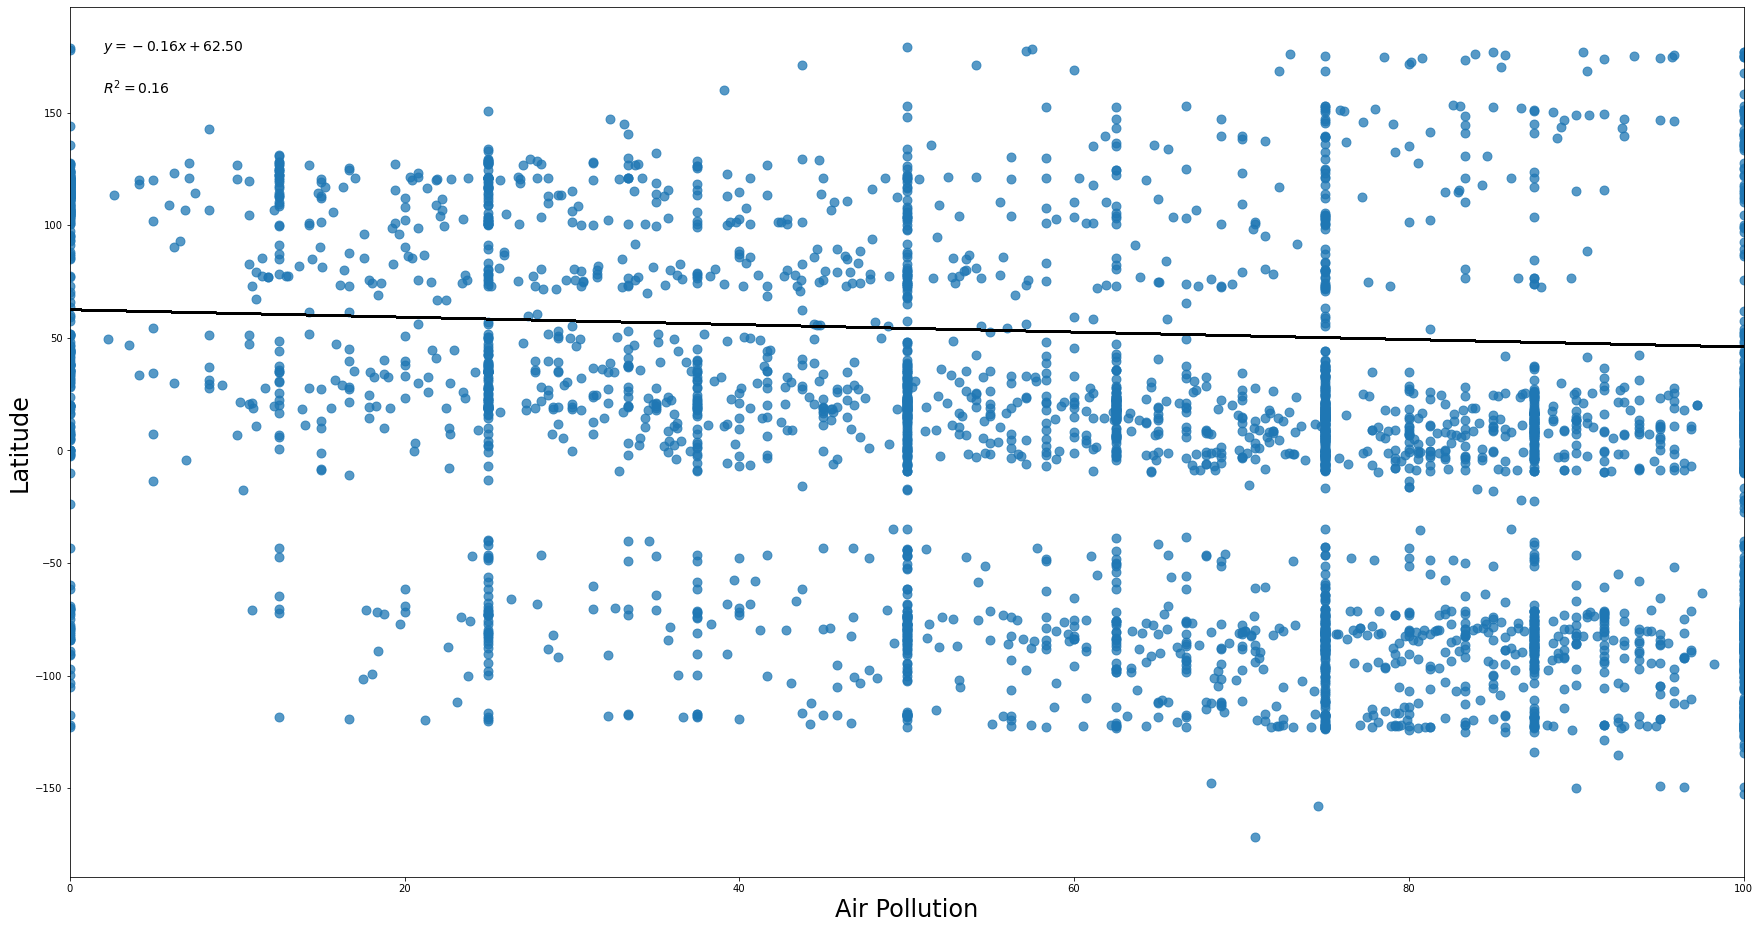

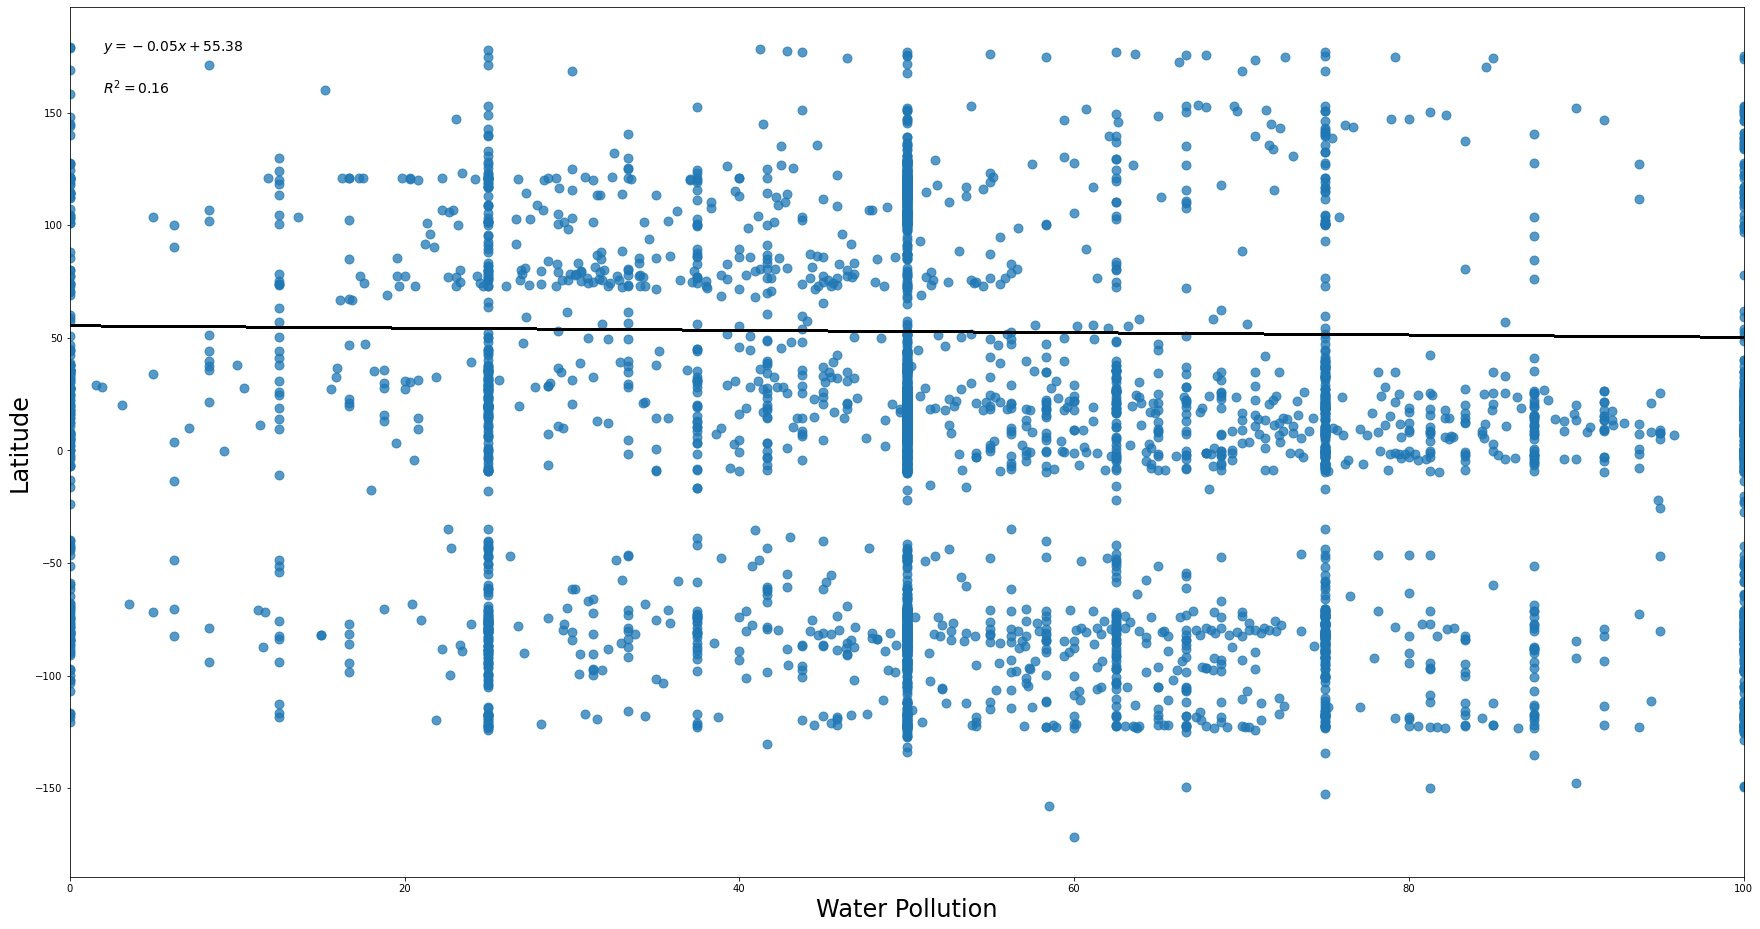

In [6]:
airquality = poll["AirQuality"]
latitude = poll["Latitude"]
longitude = poll["Longitude"]
waterquality = poll["WaterPollution"]

#create a first plot with air quality
plt.figure(figsize=(30,16))

#plt.plot(latitude, airquality)
plt.scatter(airquality, latitude, s=80, alpha=0.75)

plt.xlim([0, 100])

plt.xlabel("Air Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(latitude, airquality, 1)
predicted = np.polyval(model, latitude)

plt.plot(latitude, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

#create a second plot with water quality
plt.figure(figsize=(30,16))

plt.scatter(100-waterquality, latitude, s=80, alpha=0.75)

plt.xlim([0, 100])

plt.xlabel("Water Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(latitude, 100-waterquality, 1)
predicted = np.polyval(model, latitude)

plt.plot(latitude, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

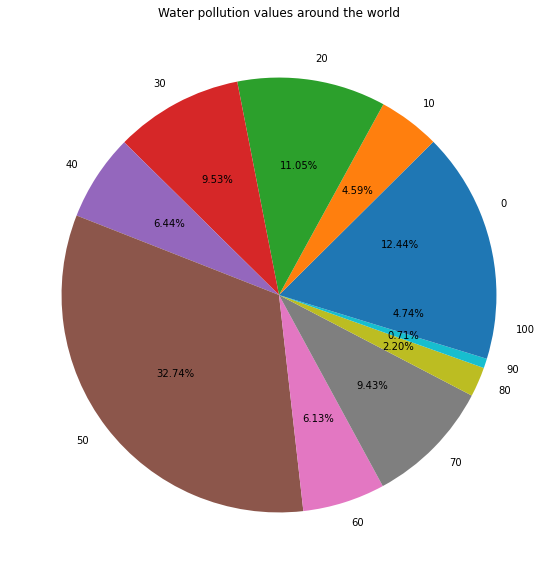

In [7]:
import matplotlib.pyplot as plt
import csv
import math
  
Cities = []
Water_pollution = []
x = [0,10,20,30,40,50,60,70,80,90,100]
histogram = [0,0,0,0,0,0,0,0,0,0,0]
count = 0

fig, ax = plt.subplots(1, figsize=(32, 10))
with open('Pollution.csv','r' ,  encoding="utf8") as csvfile:
    lines = csv.reader(csvfile, delimiter = ',')
    for row in lines:
        if count > 0:
            histogram[math.floor(float(row[6])/10)] = histogram[math.floor(float(row[6])/10)]+1
            #Cities.append(row[0])
            #Water_pollution.append(float(row[6]))
        count = count + 1
  
#plt.pie(Water_pollution,labels = Cities,autopct = '%.2f%%')
plt.pie(histogram,labels = x,autopct = '%.2f%%')
plt.title('Water pollution values around the world')
plt.show()

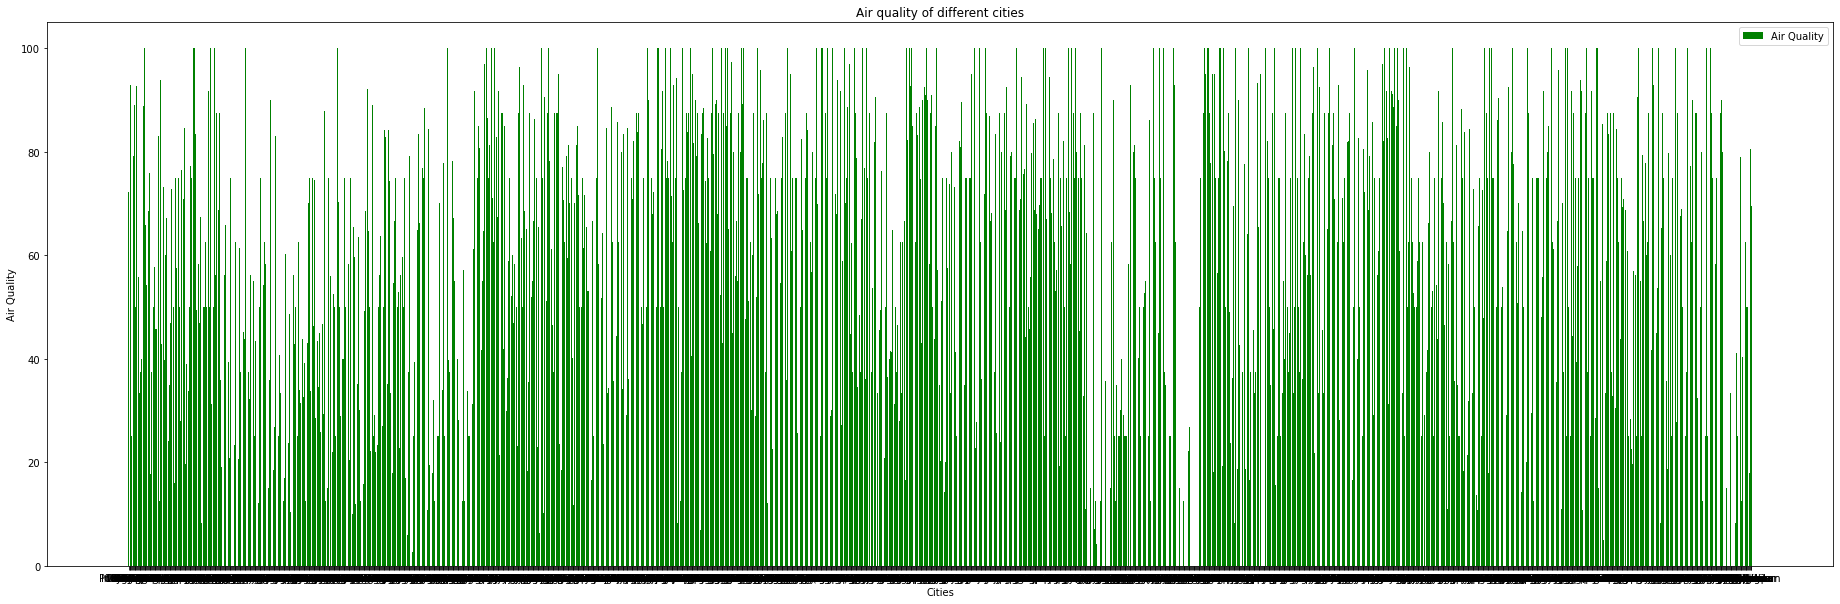

In [16]:
import matplotlib.pyplot as plt
import csv
  
x = []
y = []
count = 0

fig, ax = plt.subplots(1, figsize=(32, 10))

with open('Pollution.csv', 'r' , encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        if count > 0:
            x.append(row[0])
            y.append(float(row[5]))
        count = count + 1
  
plt.bar(x, y, color = 'g', width = 0.72, label = "Air Quality")
plt.xlabel('Cities')
plt.ylabel('Air Quality')
plt.title('Air quality of different cities')
plt.legend()

plt.show()

In [8]:
import geopandas as gpd

map_data = gpd.read_file('world_borders/WORLD_BORDERS.shp')
map_data.rename(columns = {'New_name':'UN'}, inplace = True)
map_data.shape

(246, 12)

In [9]:
map_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


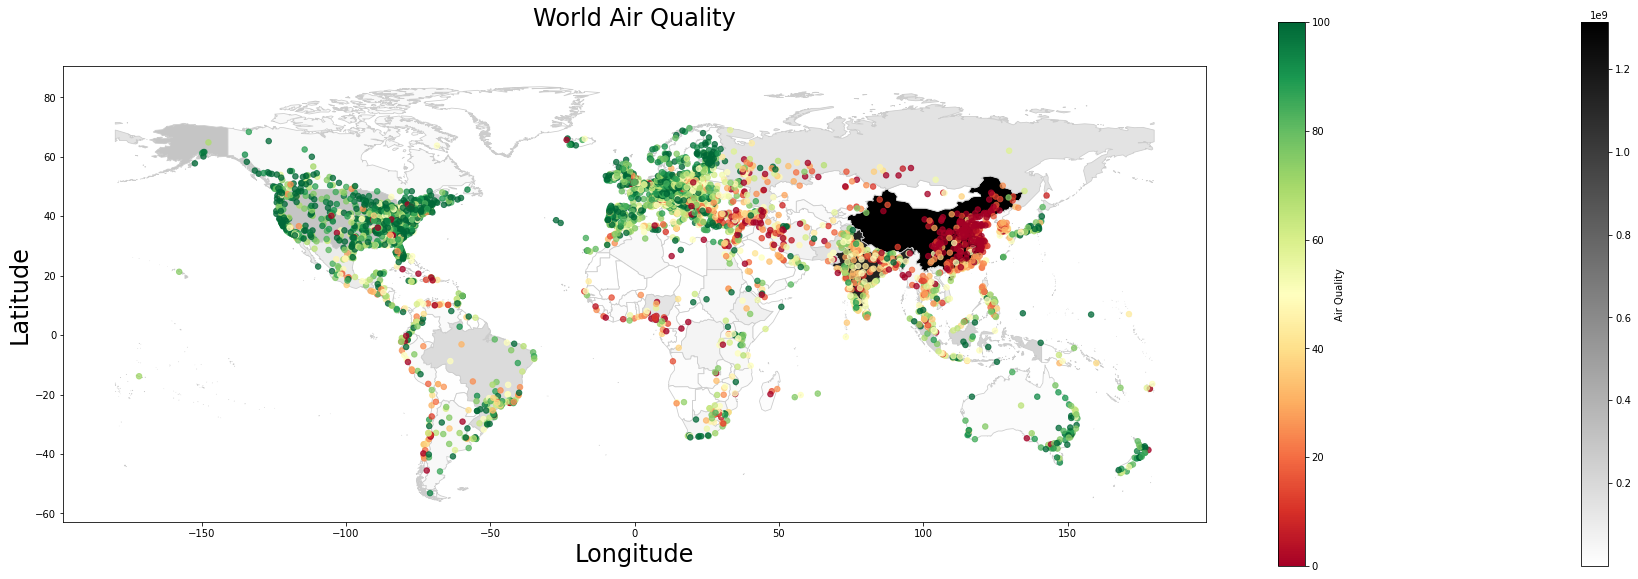

In [10]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

population = map_data[map_data["POP2005"]>0]
# Visualization layer that creates a base map
population.plot(column = 'POP2005', cmap='gray_r', label='Population', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap = cm.RdYlGn

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap, norm=norm)
r.set_array([])
plt.colorbar(r, label='Air Quality')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=airquality, cmap=my_cmap, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Air Quality", pad=40, fontsize=24)

plt.show()


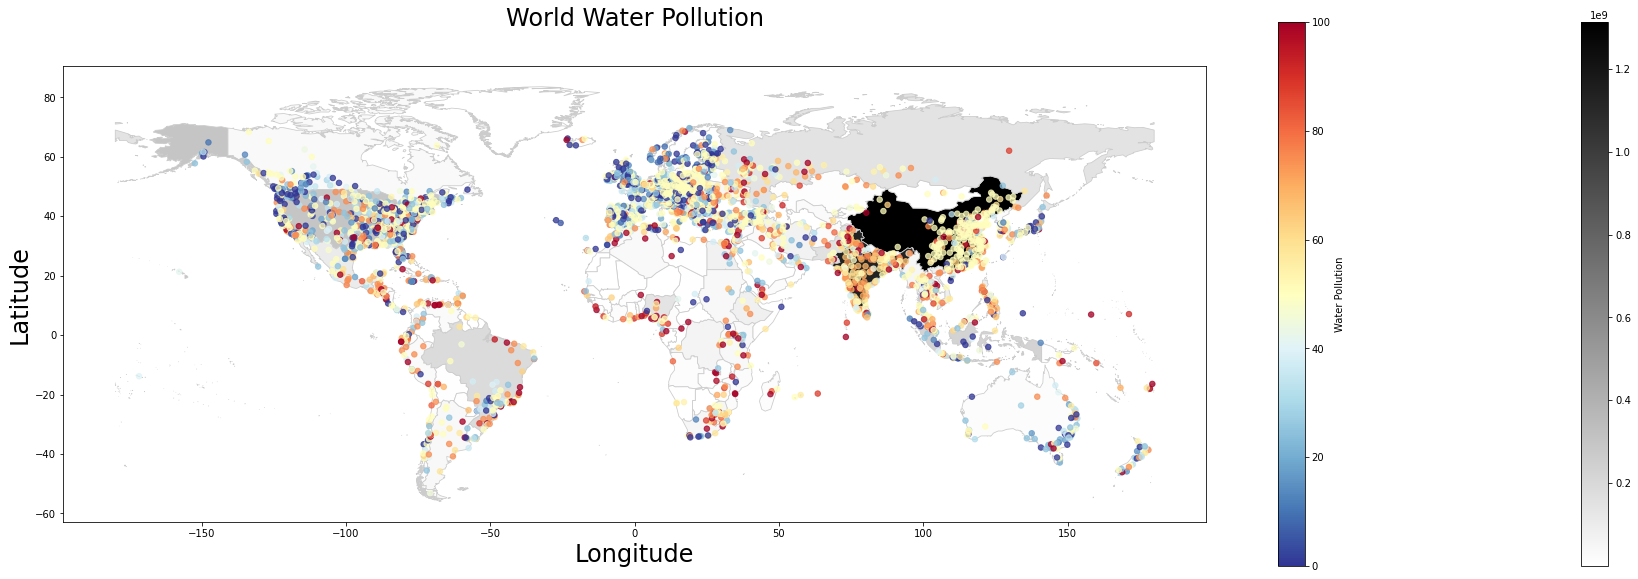

In [11]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

population = map_data[map_data["POP2005"]>0]
# Visualization layer that creates a base map
population.plot(column = 'POP2005', cmap='gray_r', label='Population', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap2 = cm.RdYlBu_r

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap2, norm=norm)
r.set_array([])
plt.colorbar(r, label='Water Pollution')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=waterquality, cmap=my_cmap2, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Water Pollution", pad=40, fontsize=24)

plt.show()

In [12]:
merged_data = pd.merge(map_data, carbon, how = 'left', on = 'NAME')
merged_data.fillna(0, inplace = True)
merged_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,...,geometry,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,...,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,...,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ...",2014.0,39651.0,149.0,14422.0,20151.0,2856.0,2073.0,1.02,581.0
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,...,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39...",2014.0,10223.0,2.0,3174.0,5782.0,390.0,876.0,1.06,360.0
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,...,"POLYGON ((19.43621 41.02107, 19.60056 41.79666...",2014.0,1559.0,191.0,1053.0,16.0,299.0,0.0,0.54,23.0
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,...,"POLYGON ((45.15387 41.19860, 46.00194 40.22555...",2014.0,1508.0,0.0,234.0,1216.0,58.0,0.0,0.50,34.0


In [13]:
print(len(merged_data))

247


/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


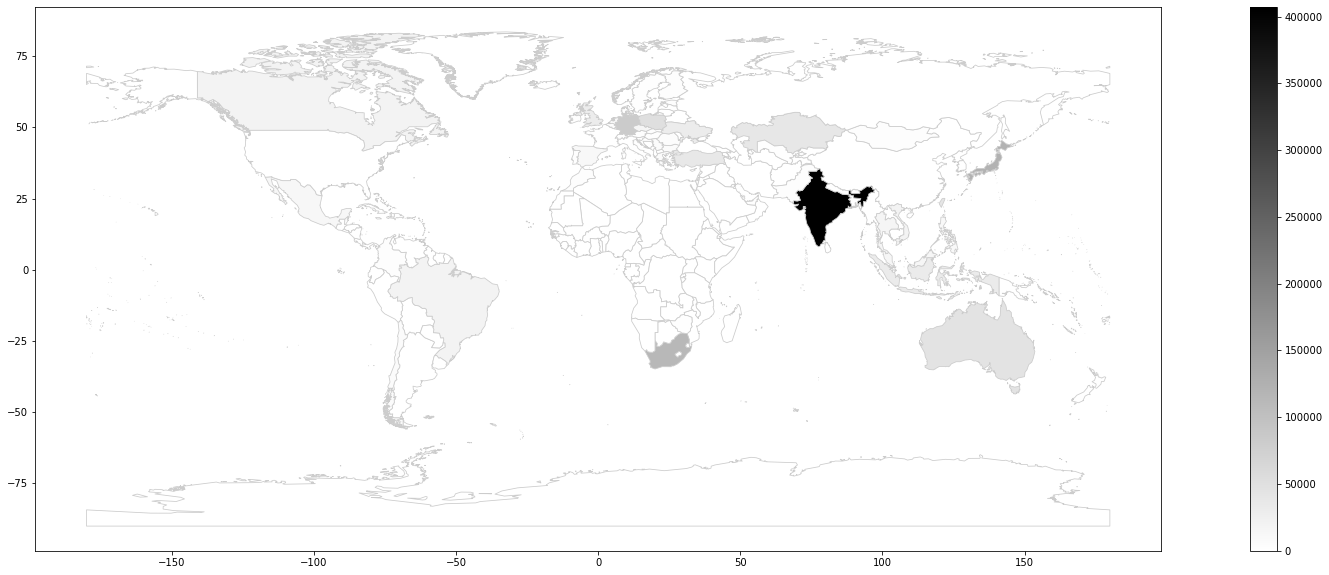

In [14]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

Solid_Fuel = map_data[merged_data["Solid Fuel"]>0]
# Visualization layer that creates a base map
merged_data.plot(column = 'Solid Fuel', cmap='gray_r', label='Solid Fuel', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

plt.show()